Dijkstra's Algorithm

Outline of the problem: 

given a weighted, directed graph and a starting vertex. return the shortest distance from the source node to all other nodes in the graph. 

inputs: 
1. n - the number of vertices
2. edges - a list of tuples in the form (u, v, w), u is the source, v is the destination and w is the weight of the edge. 
3. src - the source node. 

exceptions: if a vertex is unreachable the value -1 should be returned. 

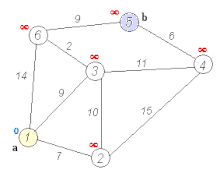

Method: 

1. convert the tuples to an adjacency list (O(n) time complexeity)
    - for all nodes add them with empty arrays to the adjacency list
    - iterate through the edge lists and add the nieghbors and their weights
2. initialize a min heap appending the source to the min heap
3. initialize a while loop dependent on there being elements in the min heap. 
    - pop from heap 
    - if shortest is already found then continue
    - assign the current distance as the shortest value for that node
    - bfs for all neighors that are not in the shortest
    - distance for neighors = previous node distance + current weight
    - heap push these values 
4. check all nodes, if a node is not in shortest then give it a value of -1. 

Dijkstra's Algorithm follows the principal of optimality. 

The principal of optimality asserts that the optimal solution to a complex problem can be broken down into simpler sub-problems. 
Solving each sub problem will all us to solve the bigger problem. 

The substructure must be designed such that the complex structure can be built from the substructures.

Consider: 

A - > B -> C -> D

In order to get the path from A -> D we first solve the smaller sub problems of: 
- A -> B 
- B -> C 
- C -> D 

Thus A -> D is broken down into the smaller problems and then solved by combining the smaller problems at the end 

In [2]:
import heapq

In [3]:
def dijkstras_algorithm(n: int, edges: list[list[int]], src: int) -> dict[int, int]: 

    # convert to adjacency list
    adj = {}
    for i in range(n): 
        adj[i] = []

    for str, dst, weight in edges: 
        adj[str].append([dst,weight])
    
    shortest = {} 
    min_heap = [[0,src]]
    while min_heap: 
        dist, node = heapq.heappop(min_heap)
        if node in shortest: 
            continue
        shortest[node] = dist

        for neighbor, dist2 in adj[node]: 
            if neighbor not in shortest: 
                heapq.heappush(min_heap, [dist + dist2,neighbor])

    for i in range(n):
        if i not in shortest: 
            shortest[i] = -1 

        
    return shortest

input example: 

In [4]:
n = 5
src = 0
edges = [[0,1,10],[0,2,3],[1,3,2],[2,1,4],[2,3,8],[2,4,2],[3,4,5]]
expected_output = {0: 0, 2: 3, 4: 5, 1: 7, 3: 9}

In [7]:
test = dijkstras_algorithm(n,edges,src)
test

{0: 0, 2: 3, 4: 5, 1: 7, 3: 9}

Time Complexeity: 
O((|E| + |V|) log |V|)
- (|E| + |V|) to traverse all vertices and edges. 
- log |V| for the inner loop push operation. 

Space Complexeity: 
O(|V|) not including the adjacency list as we as storing each vertex as a node in a binary heap.


Limitations of Dijkstra's Algorithm: 
- only returns the distance not the path that is taken to obtain the distance -> prim's Algorithm for this. 
- does not work with negative graph weights -> Bellman-Ford Algorithm for this. 

Why Dijkstra's Algorithm does not work for negative values. 

As Dijkstra's is a greedy algorithm, once a node is marked as visited it cannot be reconsidered. This is only an issue in the case of negative weights. 